In [3]:
import matplotlib.pyplot as plt
import itertools
import random
import copy

#### A. Create a class called **Schelling**, with attributes width (how many houses there are on the horizontal axis), height (how many houses on the vertical axis), empty_ratio (number of empty locations), similarity_threshold (the percentage of neighbours that you want to have in your neighbourhood), n_iterations (how many iterations of the Schelling process we do), races (number of races). (Note: we will add other attributes along the way).

In [32]:

class Schelling:
    
    def __init__(self,width,height,empty_ratio,similarity_threshold,n_iterations,races):
        self.width = width
        self.height = height
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.races = races
        
    def populate(self):
        self.empty_houses = []
        self.agents = {}
        self.all_houses = list(itertools.product(list(range(0,self.width)),list(range(0,self.height))))
        random.shuffle(self.all_houses)
        self.n_empty = int(self.width*self.height*self.empty_ratio)
        self.empty_houses = self.all_houses[-self.n_empty:]
        self.remaining_houses = self.all_houses[:-self.n_empty]
            
        for i in self.remaining_houses:
            self.agents[i] = random.randint(1,self.races)
        
    def plot_city(self):
        colour = {1:'r',2:'b',3:'g'}
        counter = 1
        fig, ax = plt.subplots()
        for key,value in self.agents.items():
            ax.scatter(key[0]+0.5,key[1]+0.5, marker = 's',s=500,c=colour[value])
        plt.subplots_adjust(left=0, right=0.6, bottom=0.1,top=1)
        plt.grid()
        plt.xticks(list(range(self.width)))
        plt.yticks(list(range(self.height)))
        plt.show()
        
    def is_unsatisfied(self,agent):
        neighbours = []
        for x in [-1,0,1]:
            for y in [-1,0,1]:
                if agent[0]+x >= 0 and agent[0]+x < self.width and agent[1]+y >= 0 and agent[1]+y < self.height:
                    neighbour = ((agent[0]+x, agent[1]+y))
                    neighbours.append(neighbour)
        neighbours.remove(agent)
        race = self.agents[agent]
        similarity_counter = 0
        for n in neighbours:
            if  race == self.agents.get(n,0):
                similarity_counter += 1
        similarity_ratio = similarity_counter/ len(neighbours)
        if similarity_ratio < self.similarity_threshold:
            return True 
        else:
            return False  
    
    def update(self):
        for n in self.all_houses:
            if n in self.empty_houses:
                pass
            elif self.is_unsatisfied(n) == True:
                rand = random.randint(0,len(self.empty_houses)-1)
                new_location = self.empty_houses.pop(rand)
                self.empty_houses.append(n)
                race = self.agents.pop(n)
                self.remaining_houses.append(new_location)
                self.agents[new_location] = race   
                
    def similarity_index(self):
        similarity_per_agent = []
        for n in self.all_houses:
            if n in self.empty_houses:
                pass
            else :
                neighbours = []
                for x in [-1,0,1]:
                    for y in [-1,0,1]:
                        if n[0]+x >= 0 and n[0]+x < self.width and n[1]+y >= 0 and n[1]+y < self.height:
                            neighbour = ((n[0]+x, n[1]+y))
                            neighbours.append(neighbour)
                neighbours.remove(n)
                race = self.agents[n]
                similarity_counter = 0
                for k in neighbours:
                    if  race == self.agents.get(k,0):
                        similarity_counter += 1
                similarity_ratio = similarity_counter/ len(neighbours)
                similarity_per_agent.append(similarity_ratio)
        similarity_index = sum(similarity_per_agent)/len(self.remaining_houses)
        similarity_index = 1 - similarity_index
        return similarity_index
    
    def simulation(self,similarity_index_threshold):
        self.populate()
        index = self.similarity_index()
        while index < similarity_index_threshold :
            self.plot_city()
            self.update()
            index = self.similarity_index()
            if index >= similarity_index_threshold: 
                break 
            

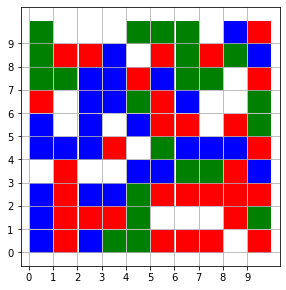

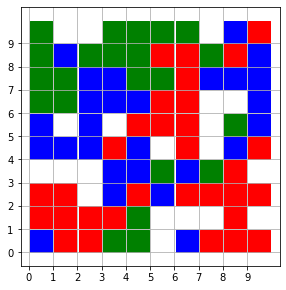

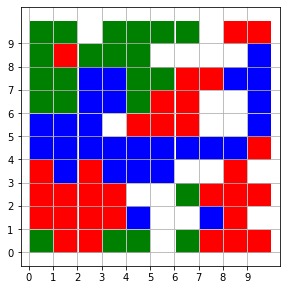

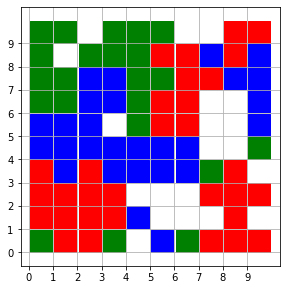

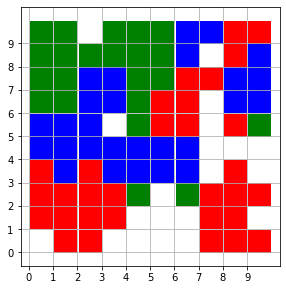

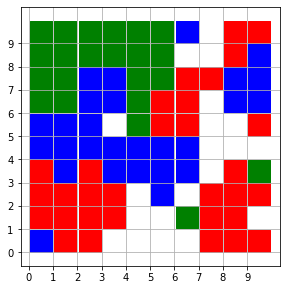

In [51]:
city = Schelling(10,10,0.2,0.3,100,3)
#city.populate()
#city.plot_city()
#city.similarity_index()
#city.is_unsatisfied((5,3))
city.simulation(0.7805)

#### G. Use this class to generate some experiments, by playing with the parameters (size of the city, similarity threshold, number of races, etc.) 

Make several experiments to analyse how the results change when we change one parameter at the time. 

In [11]:

class Schelling_Advanced:
    
    def __init__(self,width,height,empty_ratio,similarity_threshold,n_iterations,races):
        self.width = width
        self.height = height
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.races = races
        
    def populate(self):
        self.empty_houses = []
        self.agents = {}
        self.all_houses = list(itertools.product(list(range(0,self.width)),list(range(0,self.height))))
        random.shuffle(self.all_houses)
        self.n_empty = int(self.width*self.height*self.empty_ratio)
        self.empty_houses = self.all_houses[-self.n_empty:]
        self.remaining_houses = self.all_houses[:-self.n_empty]
            
        for i in self.remaining_houses:
            self.agents[i] = random.randint(1,self.races)
        
    def plot_city(self):
        colour = {1:'r',2:'b',3:'g',4:'y',5:'k'}
        counter = 1
        fig, ax = plt.subplots()
        for key,value in self.agents.items():
            ax.scatter(key[0]+0.5,key[1]+0.5, marker = 's',s=500,c=colour[value])
        plt.subplots_adjust(left=0, right=0.6, bottom=0.1,top=1)
        plt.grid()
        plt.xticks(list(range(self.width)))
        plt.yticks(list(range(self.height)))
        plt.show()
        
    def is_unsatisfied(self,agent):
        neighbours = []
        for x in [-1,0,1]:
            for y in [-1,0,1]:
                if agent[0]+x >= 0 and agent[0]+x < self.width and agent[1]+y >= 0 and agent[1]+y < self.height:
                    neighbour = ((agent[0]+x, agent[1]+y))
                    neighbours.append(neighbour)
        neighbours.remove(agent)
        race = self.agents[agent]
        similarity_counter = 0
        for n in neighbours:
            if  race == self.agents.get(n,0):
                similarity_counter += 1
        similarity_ratio = similarity_counter/ len(neighbours)
        if similarity_ratio < self.similarity_threshold:
            return True 
        else:
            return False  
    
    def update(self):
        for n in self.all_houses:
            if n in self.empty_houses:
                pass
            elif self.is_unsatisfied(n) == True:
                rand = random.randint(0,len(self.empty_houses)-1)
                new_location = self.empty_houses.pop(rand)
                self.empty_houses.append(n)
                race = self.agents.pop(n)
                self.remaining_houses.append(new_location)
                self.agents[new_location] = race   
                
    def similarity_index(self):
        similarity_per_agent = []
        for n in self.all_houses:
            if n in self.empty_houses:
                pass
            else :
                neighbours = []
                for x in [-1,0,1]:
                    for y in [-1,0,1]:
                        if n[0]+x >= 0 and n[0]+x < self.width and n[1]+y >= 0 and n[1]+y < self.height:
                            neighbour = ((n[0]+x, n[1]+y))
                            neighbours.append(neighbour)
                neighbours.remove(n)
                race = self.agents[n]
                similarity_counter = 0
                for k in neighbours:
                    if  race == self.agents.get(k,0):
                        similarity_counter += 1
                similarity_ratio = similarity_counter/ len(neighbours)
                similarity_per_agent.append(similarity_ratio)
        similarity_index = sum(similarity_per_agent)/len(self.remaining_houses)
        similarity_index = 1 - similarity_index
        return similarity_index
    
    def simulation(self,similarity_index_threshold):
        self.populate()
        index = self.similarity_index()
        while index < similarity_index_threshold :
            self.plot_city()
            self.update()
            index = self.similarity_index()
            if index >= similarity_index_threshold: 
                break 
            

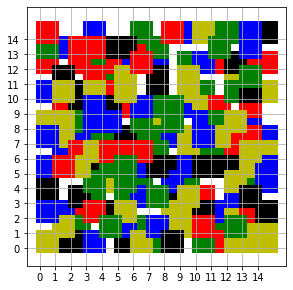

In [12]:
city_2 = Schelling_Advanced(15,15,0.2,0.3,100,5)
city_2.populate()
city_2.plot_city()
#city.similarity_index()
#city.is_unsatisfied((5,3))